In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

import matplotlib.pyplot as plt

## HIV Model

In [2]:
def make_system(gamma, mu, tau, beta, alpha, sigma, delta,  pi):
    """Make a system object for the SIR model.
    
    beta: 
    gamma: rate of new activated, uninfected CD4 lymphocytes
    tau: proportion of lymphocytes that are activated
    mu: HIV independent death rate
    alpha: rate at which latently infected cells turn into activated infected cells
    delta: rate of removal of infected cells
    sigma: rate of removal of virions
    pi : the rate at which free virions are produced
    
    returns: System object
    Activated, uninfected = R, latently infected = L, actively infected = E, free virions = V
    """
    init = State(R=200, L=0, E=0, V=.00000004)  
    
    t0 = 0
    t_end = 12000
    dt = 0.01

    return System(init=init,beta=beta, gamma=gamma, tau=tau, mu=mu, alpha=alpha,
                  delta=delta, sigma=sigma, pi=pi, t0=t0, t_end= t_end, dt = dt)

In [3]:
def update_func(state, t, system):
    """Update the model.
    
    returns: State ()    
    new_lymph = (E * system.gamma)
    lymph_death = R - mu
    Latently_infected = system.beta * V *0.1    
    actively_infected = (system.alpha * Latently_infected)
    actively_infected_fromR = (system.alpha * R)
    free_virions = (system.pi * v) - (system.sigma*v) - infected 
    """
    R, L, E, V = state
   
    dRdt = (system.tau*system.gamma) - (system.mu*R) - (system.beta*R*V)
    dLdt = (0.1*system.beta*R*V)-(system.mu*L) - (system.alpha*L)
    dEdt = ((1-0.1)*(system.beta*R*V)) + (system.alpha*L) - (system.delta*E)
    dVdt = (system.pi*E)-(system.sigma*V)
    
    R += dRdt*system.dt
    L += dLdt*system.dt
    E += dEdt*system.dt
    V += dVdt*system.dt
    

    return State(R=R, L=L, E=E, V=V)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    return frame

In [5]:
def plot_results(R, L, E, V):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(L, '--', label='L')
    plot(R, '-', label='R')
    plot(E, '-', label='E')
    plot(V, '-', label='V')
    decorate(xlabel='Time (days)',
             ylabel='Population')

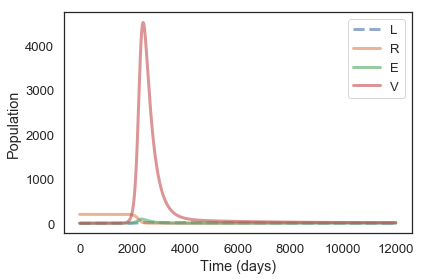

In [6]:
system = make_system(1.36, .00136, .2, .00027, .036, 2, 0.33, 100)
results = run_simulation(system, update_func)
plot_results(results.R, results.L, results.E, results.V)

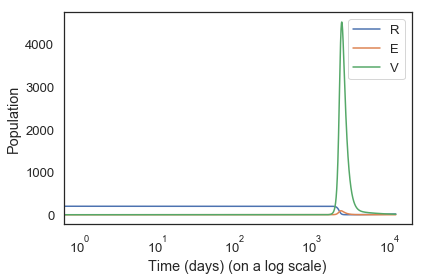

In [10]:
plt.semilogx(results.R, '-', label='R')
plt.semilogx(results.E, '-', label='E')
plt.semilogx(results.V, '-', label='V')
decorate(xlabel='Time (days) (on a log scale)',
         ylabel='Population')